In [3]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('arabic')
from nltk.stem.isri import ISRIStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from pyarabic.araby import strip_tashkeel 
from pyarabic.araby import strip_tatweel 
from pyarabic.araby import normalize_hamza
import numpy as np
import imblearn
print(imblearn.__version__)
import re
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm 
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix
import matplotlib as plt




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\emhad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0.9.1


Arabic Hate speech Lixcon

In [8]:

# The Arabic Hate speech Lixcon
#___________________________________
Lixcon = pd.read_excel('Lixcon.xlsx' ) #|
Lixcon = Lixcon.squeeze()                  #|
Lixcon = list(Lixcon)                      #|
#__________________________________#|


In [9]:

#                  __________________________________________
#                 | Reading The Train Dataset      |
#___________________________________________________________________________________
train = pd.read_excel('Hate speech 20 nov.xlsx' , sheet_name ="new_Training_data") #|
combi = train.copy()                                                               #|
#__________________________________________________________________________________#|


<b>preprocessing <b>

In [10]:

#        _____________________________________________________________
#       | This function performs the entire preprocessing of the data


def pre_processing(combi):
    combi["Lixcon"] = combi['text'].apply(lambda x: len([x for x in x.split() if x in Lixcon]))
    combi['word_count']= combi['text'].apply(lambda x : len(str(x).split(' ')))
    combi['stopwords_count'] = combi['text'].apply(lambda x: len([x for x in x.split() if x in stop]))
    combi['text'] = combi['text'].apply(lambda x: str(strip_tashkeel(x)))
    combi['text'] = combi['text'].apply(lambda x: str(strip_tatweel(x)))
    combi['text'] = combi['text'].str.replace("[إأٱآا]", "ا")
    combi['text'] = combi['text'].str.replace("[ؤ]", "و")
    combi['text'] = combi['text'].str.replace('[\d]',' ')
    combi['text'] = combi['text'].str.replace('[^\w\s]',' ')
    combi['text'] = combi['text'].str.replace('[a-zA-Z]',' ') 
    combi['text'] = combi['text'].str.replace('[_]',' ')
    combi['text'] = combi['text'].apply(lambda x: " ".join(x.split()))
    combi['text'] = combi['text'].str.strip()
    combi['text'].replace([" ",""] , np.nan, inplace=True)
    combi.dropna(subset=['text'], inplace=True)
    combi['text'] = combi['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
    st = ISRIStemmer()
    combi['text'] = combi['text'].apply(lambda x: " ".join([st.stem(word) for word in x.split()])) 
    return combi

In [11]:
combi = pre_processing(combi)

C:\Users\emhad\AppData\Local\Temp\ipykernel_2680\2569263154.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  combi['text'] = combi['text'].str.replace("[إأٱآا]", "ا")
C:\Users\emhad\AppData\Local\Temp\ipykernel_2680\2569263154.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  combi['text'] = combi['text'].str.replace("[ؤ]", "و")
C:\Users\emhad\AppData\Local\Temp\ipykernel_2680\2569263154.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  combi['text'] = combi['text'].str.replace('[\d]',' ')
C:\Users\emhad\AppData\Local\Temp\ipykernel_2680\2569263154.py:14: FutureWarning: The default value of regex will change from True to False in a future version.
  combi['text'] = combi['text'].str.replace('[^\w\s]',' ')
C:\Users\emhad\AppData\Local\Temp\ipykernel_2680\2569263154.py:15: FutureWarning: The default value of regex will change from

In [12]:


#           ______________________________________________
#          | Term Frequency–Inverse Document Frequency  (TF-IDF)  |


tfidf_vectorizer = TfidfVectorizer(max_df=0.8,min_df=5 )
tfidf = tfidf_vectorizer.fit_transform(combi['text'])



In [13]:

#                  _________________________________________
#                 |      This code adds basic features to TF-IDF matrix      |

Basic_Featue_Extraction = combi[[ 'Lixcon' , 'word_count', 'stopwords_count']].to_numpy()
Basic_Featue_Extraction = Basic_Featue_Extraction.astype(float)

All_Features = np.concatenate((tfidf.toarray(), Basic_Featue_Extraction), axis=1)

<b> Model Building <b>

Random Forest <b>(best results) <b>

The Accuracy of Random forest is --> 0.9185558354324097
0.9148375768217735
0.9270462633451957
0.902946273830156
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       614
           1       0.93      0.90      0.91       577

    accuracy                           0.92      1191
   macro avg       0.92      0.92      0.92      1191
weighted avg       0.92      0.92      0.92      1191

[[573  41]
 [ 56 521]]


D:\Users\emhad\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


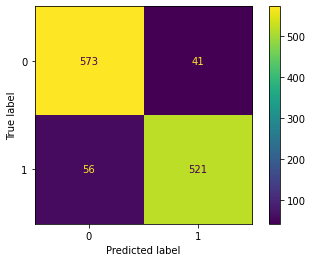

In [14]:

#                  ______________________________________________
#                 |                 Model Building               |



#   Building the model using Random Forest algorithm


train_tf = All_Features[0:]

# splitting data into training and test set using train_test_split function
Tr_D_bow, Te_D_bow, Tr_L_bow , Te_L_bow = train_test_split(train_tf, combi['class'], random_state=45, test_size=0.2)
# Create Random Forest classifer object
RF = RandomForestClassifier()
# Train Random Forest  Classifer
RF = RF.fit(Tr_D_bow,Tr_L_bow)
#Predict the response for test dataset
RF_prediction = RF.predict(Te_D_bow)


#These codes print the results of the model
print('The Accuracy of Random forest is -->',metrics.accuracy_score(Te_L_bow, RF_prediction))
print(metrics.f1_score(Te_L_bow, RF_prediction))
print(metrics.precision_score(Te_L_bow, RF_prediction))
print(metrics.recall_score(Te_L_bow, RF_prediction))
print(classification_report(Te_L_bow,RF_prediction))


#This code visualize the results as a matrix
print(confusion_matrix(Te_L_bow,RF_prediction))
plot_confusion_matrix(RF,Te_D_bow,Te_L_bow)


SVM 

In [15]:
# Building the model Using SVM algorithm


train_tf = All_Features[0:]


# splitting data into training and test set using train_test_split function
Tr_D_bow, Te_D_bow, Tr_L_bow , Te_L_bow = train_test_split(train_tf, combi['class'], random_state=45, test_size=0.2)
# Create SVM classifer object
SVM = svm.SVC()
# Train SVM Classifer
SVM = SVM.fit(Tr_D_bow,Tr_L_bow)
#Predict the response for test dataset
SVM_prediction = SVM.predict(Te_D_bow)


#These codes print the results of the model
print('The Accuracy of SVMC is -->',metrics.accuracy_score(Te_L_bow, SVM_prediction))
print(metrics.f1_score(Te_L_bow, SVM_prediction))
print(metrics.precision_score(Te_L_bow, SVM_prediction))
print(metrics.recall_score(Te_L_bow, SVM_prediction))

The Accuracy of SVMC is --> 0.8597816960537363
0.8496849684968497
0.8838951310861424
0.8180242634315424


Naïve Bayes

In [16]:
# Building the model Naïve Bayes algorithm


train_tf = All_Features[0:]

# splitting data into training and test set using train_test_split function
Tr_D_bow, Te_D_bow, Tr_L_bow , Te_L_bow = train_test_split(train_tf, combi['class'], random_state=45, test_size=0.2)
#Create Naïve Bayes Gaussian Classifier object
Nbayes = GaussianNB()
# Train Naïve Bayes Classifer
Nbayes.fit(Tr_D_bow,Tr_L_bow)
#Predict the response for test dataset
Nbayes_prediction= Nbayes.predict(Te_D_bow)

#These codes print the results of the model
print('The Accuracy of naive bayes is -->',metrics.accuracy_score(Te_L_bow, Nbayes_prediction))
print(metrics.f1_score(Te_L_bow, Nbayes_prediction))
print(metrics.precision_score(Te_L_bow, Nbayes_prediction))
print(metrics.recall_score(Te_L_bow, Nbayes_prediction))


The Accuracy of naive bayes is --> 0.799328295549958
0.8016597510373443
0.7691082802547771
0.8370883882149047


Decision Tree

In [17]:
# Building the model Decision Tree algorithm


train_tf = All_Features[0:]

# splitting data into training and test set using train_test_split function
Tr_D_bow, Te_D_bow, Tr_L_bow , Te_L_bow = train_test_split(train_tf, combi['class'], random_state=45, test_size=0.2)
# Create Decision Tree classifer object
Decision_tree = DecisionTreeClassifier()
# Train Decision Tree Classifer
Decision_tree = Decision_tree.fit(Tr_D_bow,Tr_L_bow)
#Predict the response for test dataset
Decision_tree_prediction = Decision_tree.predict(Te_D_bow)


#These codes print the results of the model
print('The Accuracy of Decision Tree is -->',metrics.accuracy_score(Te_L_bow, Decision_tree_prediction))
print(metrics.f1_score(Te_L_bow, Decision_tree_prediction))
print(metrics.precision_score(Te_L_bow, Decision_tree_prediction))
print(metrics.recall_score(Te_L_bow, Decision_tree_prediction))

The Accuracy of Decision Tree is --> 0.8648194794290512
0.8613264427217917
0.8561643835616438
0.8665511265164645


Logistic Regression

In [19]:
# Building the model Logistic Regression algorithm



train_tf = All_Features[0:]


# splitting data into training and test set using train_test_split function
Tr_D_bow, Te_D_bow, Tr_L_bow , Te_L_bow = train_test_split(train_tf, combi['class'], random_state=45, test_size=0.2)
#Create Logistic Regression Classifier object
Logregression = LogisticRegression()
# Train Logistic Regression Classifer
Logregression.fit(Tr_D_bow,Tr_L_bow)
#Predict the response for test dataset
Logregression_prediction=Logregression.predict(Te_D_bow)

#These codes print the results of the model
print('The Accuracy of Logistic Regression is -->',metrics.accuracy_score(Te_L_bow, Logregression_prediction))
print(metrics.f1_score(Te_L_bow, Logregression_prediction))
print(metrics.precision_score(Te_L_bow, Logregression_prediction))
print(metrics.recall_score(Te_L_bow, Logregression_prediction))


The Accuracy of Logistic Regression is --> 0.9126784214945424
0.9071428571428573
0.9355432780847146
0.8804159445407279


D:\Users\emhad\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


k-nearest neighbors(KNN)

In [21]:
# Building the model k-nearest neighbors(KNN)

train_tf = All_Features[0:]

# splitting data into training and test set using train_test_split function
Tr_D_bow, Te_D_bow, Tr_L_bow , Te_L_bow = train_test_split(train_tf, combi['class'], random_state=45, test_size=0.2)
#Create KNN Classifier object
knn = KNeighborsClassifier(n_neighbors=5)
# Train Knn Classifer
knn.fit(Tr_D_bow, Tr_L_bow)
#Predict the response for test dataset
knn_prediction = knn.predict(Te_D_bow)


#These codes print the results of the model
print('The Accuracy of KNN is -->',metrics.accuracy_score(Te_L_bow, knn_prediction))
print(metrics.f1_score(Te_L_bow, knn_prediction))
print(metrics.precision_score(Te_L_bow, knn_prediction))
print(metrics.recall_score(Te_L_bow, knn_prediction))


The Accuracy of KNN is --> 0.8505457598656591
0.8438596491228071
0.8543516873889876
0.8336221837088388


 k-means cluster

In [22]:
# Building the model using k-means cluster


train_tf = All_Features[0:]

#Create k-means Classifier object
kmeans = KMeans(n_clusters=2)
# Train k-eans Classifer
kmeans.fit(All_Features)
#Predict the response for test dataset
kmeans_pre = kmeans.predict(All_Features)

#These codes print the results of the model
print('The Accuracy of KNN is -->',metrics.accuracy_score(combi['class'], kmeans.labels_))
print(metrics.f1_score(combi['class'], kmeans.labels_))
print(metrics.precision_score(combi['class'], kmeans.labels_))
print(metrics.recall_score(combi['class'], kmeans.labels_))



The Accuracy of KNN is --> 0.4431570109151973
0.26441881100266196
0.3791348600508906
0.20299727520435967


 Model Evaluation & Testing  using out of sample Data

In [23]:
#_____________________ Model Evaluation & Testing  using out of sample Data ____________

# read the Data
train1 = pd.read_excel('Testing.xlsx', sheet_name="testing 2")

combi1 = train1.copy()

combi1['Tweet'] = combi1['Tweet'].astype(str)


#        _____________________________________________________________
#       | This function performs the entire preprocessing of the data

def pre_processing1(combi1):
    combi1['Tweet'] = combi1['Tweet'].apply(lambda x: str(strip_tashkeel(x)))
    combi1['Tweet'] = combi1['Tweet'].apply(lambda x: str(strip_tatweel(x)))
    combi1['Tweet'] = combi1['Tweet'].str.replace("[إأٱآا]", "ا")
    combi1['Tweet'] = combi1['Tweet'].str.replace("[ؤ]", "و")
    combi1['Tweet'] = combi1['Tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
    combi1['Tweet'] = combi1['Tweet'].str.replace('[\d]',' ')
    combi1['Tweet'] = combi1['Tweet'].str.replace('[^\w\s]',' ')
    combi1['Tweet'] = combi1['Tweet'].str.replace('[a-zA-Z]',' ') 
    combi1['Tweet'] = combi1['Tweet'].str.replace('[_]',' ')  
    combi1['Tweet'] = combi1['Tweet'].apply(lambda x: " ".join(x.split()))
    combi1['Tweet'] = combi1['Tweet'].str.strip()
    combi1['Tweet'].replace([" ",""] , np.nan, inplace=True)
    combi1.dropna(subset=['Tweet'], inplace=True)
    combi1["Lixcon"] = combi1['Tweet'].apply(lambda x: len([x for x in x.split() if x in Lixcon]))
    combi1['word_count']= combi1['Tweet'].apply(lambda x : len(str(x).split(' ')))
    combi1['stopwords_count'] = combi1['Tweet'].apply(lambda x: len([x for x in x.split() if x in stop]))
    combi1['Tweet'] = combi1['Tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
    st = ISRIStemmer()
    combi1['Tweet'] = combi1['Tweet'].apply(lambda x: " ".join([st.stem(word) for word in x.split()])) 
    return combi1


In [24]:
combi1 = pre_processing1(combi1)

C:\Users\emhad\AppData\Local\Temp\ipykernel_2680\1568609786.py:17: FutureWarning: The default value of regex will change from True to False in a future version.
  combi1['Tweet'] = combi1['Tweet'].str.replace("[إأٱآا]", "ا")
C:\Users\emhad\AppData\Local\Temp\ipykernel_2680\1568609786.py:18: FutureWarning: The default value of regex will change from True to False in a future version.
  combi1['Tweet'] = combi1['Tweet'].str.replace("[ؤ]", "و")
C:\Users\emhad\AppData\Local\Temp\ipykernel_2680\1568609786.py:20: FutureWarning: The default value of regex will change from True to False in a future version.
  combi1['Tweet'] = combi1['Tweet'].str.replace('[\d]',' ')
C:\Users\emhad\AppData\Local\Temp\ipykernel_2680\1568609786.py:21: FutureWarning: The default value of regex will change from True to False in a future version.
  combi1['Tweet'] = combi1['Tweet'].str.replace('[^\w\s]',' ')
C:\Users\emhad\AppData\Local\Temp\ipykernel_2680\1568609786.py:22: FutureWarning: The default value of regex 

In [25]:
# TF-IDF
tfidf1 = tfidf_vectorizer.transform(combi1['Tweet'])


#                  _________________________________________
#                 |      This code adds basic features to TF-IDF matrix      |

Basic_Featue_Extraction1 = combi1[[ 'Lixcon' , 'word_count', 'stopwords_count']].to_numpy()
Basic_Featue_Extraction1 = Basic_Featue_Extraction1.astype(float)
All_Features_2 = np.concatenate((tfidf1.toarray(), Basic_Featue_Extraction1), axis=1)


#  using Random Forest algorithm
predict = RF.predict( All_Features_2[0:])
predict = pd.DataFrame(predict)
combi1['Class'] = predict
# To reveiw results in variable explorer in pre-cleaning part tweet with predicted column
train1['Class'] = predict

print('The Accuracy of RF is -->',metrics.accuracy_score(train1['actual'], train1['Class']))


The Accuracy of RF is --> 0.9230769230769231
